In [1]:
from keras.datasets import reuters

# 8982 training examples
# 2246 testing examples
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


/usr/local/lib/python3.9/site-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.9/site-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

# Use one-hot encoding for categorical data - put a one in place of the label index within a zeros array
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# Because the output layer is 46 units, the units of the hidden layers should be > 46
model.add(layers.Dense(64, activation='relu'))
# 46-dimensional output vector of the probability for each of the 46 classes - probability distribution
model.add(layers.Dense(46, activation='softmax'))

In [5]:
# categorical_crossentropy measure the distance between two probability distributions
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Put apart a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
# First try 20 epochs then graph the loss and accuracy to see that the model
# begins to overfit after 9 epochs--the location where the graph starts to decline
# history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp_5ma77j9.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp_5ma77j9.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 24s 171ms/step - loss: 3.2289 - accuracy: 0.4106 - val_loss: 1.8253 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 1s 62ms/step - loss: 1.5895 - accuracy: 0.6942 - val_loss: 1.3428 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 75ms/step - loss: 1.1567 - accuracy: 0.7584 - val_loss: 1.14

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

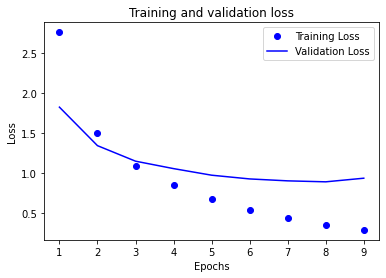

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validation loss
acc = history.history['accuracy'] # accuracy

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

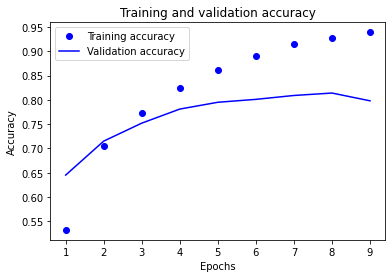

In [10]:
plt.clf()

val_acc = history.history['val_accuracy'] # validation accuracy

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9965 - accuracy: 0.7858


In [26]:
predictions = model.predict(x_test)
len(predictions[0]) # Result 46 - 46 different classes

np.sum(predictions[0]) # the probabilities add up to 1
np.amax(predictions[0]) # the highest value in the array
np.argmax(predictions[1]) # index of the highest value

10

In [28]:
# Turn the labels array into an integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
# integer labels use a different loss function: sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])